In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
with open('./deep-learning-notes/dinos.txt','r') as dino:
    dinos = dino.read()

In [3]:
dinos = dinos.lower()

In [4]:
new = []
char  = ""
for ch in dinos:
    
    if ch != '\n':
        char = char + ch
    else:
        new.append(len(char))
        char = ""

In [6]:
new = np.array(new)

In [7]:
new.mean()

11.96742671009772

In [12]:
char = list(set(dinos))

In [13]:
char

['s',
 'y',
 'n',
 't',
 'v',
 'q',
 'f',
 'j',
 'd',
 'a',
 'k',
 'l',
 'z',
 'g',
 'r',
 'w',
 'h',
 'e',
 'b',
 'i',
 'm',
 'p',
 '\n',
 'u',
 'o',
 'c',
 'x']

In [14]:
char_to_idx = {c:i for i,c in enumerate(sorted(char))}

In [15]:
idx_to_char = {i:c for i,c in enumerate(sorted(char))}

In [16]:
text = np.array([char_to_idx[c] for c in dinos])

In [17]:
text.shape

(19909,)

In [18]:
text[:500]

array([ 1,  1,  3,  8,  5, 14, 15, 19,  1, 21, 18, 21, 19,  0,  1,  1, 18,
        4, 15, 14, 25, 24,  0,  1,  2,  4,  1, 12, 12,  1,  8, 19,  1, 21,
       18, 21, 19,  0,  1,  2,  5, 12,  9, 19,  1, 21, 18, 21, 19,  0,  1,
        2, 18,  9,  3, 20, 15, 19,  1, 21, 18, 21, 19,  0,  1,  2, 18, 15,
       19,  1, 21, 18, 21, 19,  0,  1,  2, 25,  4, 15, 19,  1, 21, 18, 21,
       19,  0,  1,  3,  1, 14, 20,  8, 15, 16,  8, 15, 12,  9, 19,  0,  1,
        3,  8,  5, 12, 15, 21, 19,  1, 21, 18, 21, 19,  0,  1,  3,  8,  5,
       18, 15, 18,  1, 16, 20, 15, 18,  0,  1,  3,  8,  9, 12, 12,  5, 19,
        1, 21, 18, 21, 19,  0,  1,  3,  8,  9, 12, 12, 15,  2,  1, 20, 15,
       18,  0,  1,  3, 18,  9, 19, 20,  1, 22, 21, 19,  0,  1,  3, 18, 15,
        3,  1, 14, 20,  8, 15, 19,  1, 21, 18, 21, 19,  0,  1,  3, 18, 15,
       20,  8, 15, 12, 21, 19,  0,  1,  3, 20,  9, 15, 19,  1, 21, 18, 21,
       19,  0,  1,  4,  1, 13,  1, 14, 20,  9, 19,  1, 21, 18, 21, 19,  0,
        1,  4,  1, 19,  1

In [19]:
import tensorflow as tf

In [20]:
sam_len = 20

In [21]:
char_dataset = tf.data.Dataset.from_tensor_slices(text)

In [22]:
name_seq =  char_dataset.batch(sam_len+1,drop_remainder=True)

In [23]:
def create_seq(seq):
    input_txt = seq[:-1]
    target_txt = seq[1:]
    
    return input_txt,target_txt

In [24]:
dataset  = name_seq.map(create_seq)

In [25]:
for input_txt,target_txt in dataset.take(1):
    print("".join(idx_to_char[ch] for ch in input_txt.numpy()))
    print("".join(idx_to_char[ch] for ch in target_txt.numpy()))

aachenosaurus
aardon
achenosaurus
aardony


In [26]:
buffersize = 1000
batch_size = 64
dataset = dataset.shuffle(buffersize).batch(batch_size,drop_remainder=True)

In [27]:
embed_dim = 32

In [28]:
vocab_size = len(char)

In [29]:
rnn_neurons = 1024

In [30]:
from tensorflow.keras.losses import sparse_categorical_crossentropy

In [31]:
def sparse_cat_loss(y_true,y_pred):
    return sparse_categorical_crossentropy(y_true,y_pred,from_logits=True)

In [32]:
from tensorflow.keras.models import Sequential
from keras.layers import GRU,Embedding,Dense

In [33]:
def create_model(vocab_size, embed_dim, rnn_neurons, batch_size):
    model = Sequential()
    model.add(Embedding(vocab_size, embed_dim,batch_input_shape=[batch_size, None]))
    model.add(GRU(rnn_neurons,return_sequences=True,stateful=True,recurrent_initializer='glorot_uniform'))
    # Final Dense Layer to Predict
    model.add(Dense(vocab_size))
    model.compile(optimizer='adam', loss=sparse_cat_loss) 
    return model

In [34]:
model = create_model(vocab_size,embed_dim,rnn_neurons,batch_size)

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (64, None, 32)            864       
_________________________________________________________________
gru (GRU)                    (64, None, 1024)          3250176   
_________________________________________________________________
dense (Dense)                (64, None, 27)            27675     
Total params: 3,278,715
Trainable params: 3,278,715
Non-trainable params: 0
_________________________________________________________________


In [36]:
epochs = 50
model.fit(dataset,epochs = epochs,verbose=1)

Epoch 1/50
14/14 [==============================] - 13s 786ms/step - loss: 3.6339
Epoch 2/50
14/14 [==============================] - 11s 801ms/step - loss: 3.1953
Epoch 3/50
14/14 [==============================] - 11s 789ms/step - loss: 3.0170
Epoch 4/50
14/14 [==============================] - 11s 788ms/step - loss: 2.7413
Epoch 5/50
14/14 [==============================] - 11s 786ms/step - loss: 2.6077
Epoch 6/50
14/14 [==============================] - 11s 785ms/step - loss: 2.4499
Epoch 7/50
14/14 [==============================] - 11s 782ms/step - loss: 2.2804
Epoch 8/50
14/14 [==============================] - 11s 780ms/step - loss: 2.1710
Epoch 9/50
14/14 [==============================] - 11s 781ms/step - loss: 2.1019
Epoch 10/50
14/14 [==============================] - 11s 781ms/step - loss: 2.0778
Epoch 11/50
14/14 [==============================] - 11s 783ms/step - loss: 2.0051
Epoch 12/50
14/14 [==============================] - 11s 783ms/step - loss: 1.9727
Epoch 13/50
1

In [37]:
def generate_text(model, start_seed,gen_size=100,temp=1.0):   

    # Number of characters to generate
    num_generate = gen_size

    # Vecotrizing starting seed text
    input_eval = [char_to_idx[s] for s in start_seed]

    # Expand to match batch format shape
    input_eval = tf.expand_dims(input_eval, 0)

    # Empty list to hold resulting generated text
    text_generated = []

    # Temperature effects randomness in our resulting text
    # The term is derived from entropy/thermodynamics.
    # The temperature is used to effect probability of next characters.
    # Higher probability == lesss surprising/ more expected
    # Lower temperature == more surprising / less expected

    temperature = temp

    # Here batch size == 1
    model.reset_states()

    for i in range(num_generate):

# Generate Predictions
        predictions = model(input_eval)

# Remove the batch shape dimension
        predictions = tf.squeeze(predictions, 0)

# Use a cateogircal disitribution to select the next character
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

# Pass the predicted charracter for the next input
        input_eval = tf.expand_dims([predicted_id], 0)

# Transform back to character letter
        text_generated.append(idx_to_char[predicted_id])

    return (start_seed + ''.join(text_generated))

In [38]:
loss = pd.DataFrame(model.history.history)
loss.head()

,loss
0,3.669472
1,3.173765
2,2.937030
3,2.716039
4,2.589468


<AxesSubplot:>

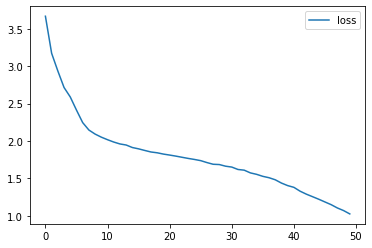

In [39]:
loss.plot()

In [40]:
model.save('./Dinosaur1.h5')

In [41]:
models = create_model(vocab_size,embed_dim,rnn_neurons,batch_size=1)
models.load_weights('./Dinosaur1.h5')
models.build(tf.TensorShape([1, None]))

In [42]:
from termcolor import colored

In [47]:
def generate():
    start_seed = input("Enter the start string:  ")
    nc = int(input("Enter the number of characters: "))
    temp = float(input("Enter the entropy (float): "))
    new_string = generate_text(models,start_seed,nc,temp)
    print("\n")
    print(f"We have a new dinosaur discovered!!! It is {colored(new_string,'red')}")
    print("\n")
    response = input("Do you like it (y/n): ")
    if response == 'n':
        generate()
    else:
        print("Thanks")
        return 0

In [48]:
generate()

Enter the start string:  raghav
Enter the number of characters: 5
Enter the entropy (float): 06


We have a new dinosaur discovered!!! It is raghavhdrrc


Do you like it (y/n): y
Thanks


0